# Data Visualization

**Loading CSV file**

In [30]:
# Importing Libraries
import praw
import csv
from datetime import datetime
import os
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from deep_translator import GoogleTranslator
from langdetect import detect
import re

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Getting current working directory
current_dir = os.getcwd()

# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining full path to the CSV file
output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Loading CSV using pandas
df = pd.read_csv(output_file)

# Previewing the first few rows
print(df.head())

   type  post_id comment_id                author          created_utc  score  \
0  post  1lf4g6e        NaN  Medical-Teaching-405  2025-06-19T07:11:08      1   
1  post  1lf4emr        NaN      Ok-Broccoli-1906  2025-06-19T07:08:25      1   
2  post  1lf4bx2        NaN        AsideSuper7951  2025-06-19T07:03:32      1   
3  post  1lf4bva        NaN  Glass_Marionberry_33  2025-06-19T07:03:27      1   
4  post  1lf48hv        NaN              Bannatan  2025-06-19T06:57:44      1   

                                               title  \
0                   Life isn't quite what I expected   
1                    Why can't things just be right?   
2  Is there anything at all to do with life becom...   
3  Feeling really alone, just need someone kind t...   
4                                I m so numb CW vent   

                                                text   subreddit flair  \
0  Hello, I've been in a dark place for the last ...  depression   NaN   
1  Literally nothing at all 

In [3]:
# Counting number of posts
num_posts = df[df['type'] == 'post'].shape[0]
print("Number of posts:", num_posts)

Number of posts: 9990


In [4]:
# Post with highest upvotes
highest_upvote_post = df.loc[df['upvotes'].idxmax()]
print("Post with Highest Upvotes:")
print(highest_upvote_post[['upvotes', 'downvotes', 'author', 'title', 'text', 'url']])
print("\n")

# Post with highest downvotes
highest_downvote_post = df.loc[df['downvotes'].idxmax()]
print("Post with Highest Downvotes:")
print(highest_downvote_post[['upvotes', 'downvotes', 'author', 'title', 'text', 'url']])


Post with Highest Upvotes:
upvotes                                                  21076
downvotes                                                    0
author                                         maximum_squeeze
title        I tell work I'm bringing my lunch allowance ho...
text         I 24(f) noticed sometime last year that my wif...
url          https://www.reddit.com/r/confession/comments/1...
Name: 30297, dtype: object


Post with Highest Downvotes:
upvotes                                                      1
downvotes                                                    0
author                                    Medical-Teaching-405
title                         Life isn't quite what I expected
text         Hello, I've been in a dark place for the last ...
url          https://www.reddit.com/r/depression/comments/1...
Name: 0, dtype: object


In [5]:
# Sorting by upvotes descending
sorted_by_upvotes = df.sort_values(by='upvotes', ascending=False)

# Displaying top 5 rows
print("Top 5 posts by upvotes:")
print(sorted_by_upvotes[['upvotes', 'downvotes', 'author', 'title', 'url']].head())


Top 5 posts by upvotes:
       upvotes  downvotes                author  \
30297    21076          0       maximum_squeeze   
37612    12804          0        Charlesian2000   
16895     9859          0                 tmsaw   
37613     8023          0                   NaN   
46185     7964          0  WeddingCharacter3713   

                                                   title  \
30297  I tell work I'm bringing my lunch allowance ho...   
37612  I am not really human anymore, due to permanen...   
16895                                                NaN   
37613                                                NaN   
46185                                                NaN   

                                                     url  
30297  https://www.reddit.com/r/confession/comments/1...  
37612  https://www.reddit.com/r/confession/comments/1...  
16895                                                NaN  
37613                                                NaN  
46185        

In [6]:
# Sorting by downvotes descending
sorted_by_downvotes = df.sort_values(by='downvotes', ascending=False)

# Displaying top 5 rows
print("Top 5 posts by downvotes:")
print(sorted_by_downvotes[['upvotes', 'downvotes', 'author', 'title', 'url']].head())


Top 5 posts by downvotes:
        upvotes  downvotes                author  \
106313        1          0         AutoModerator   
0             1          0  Medical-Teaching-405   
1             1          0      Ok-Broccoli-1906   
2             1          0        AsideSuper7951   
3             1          0  Glass_Marionberry_33   

                                                    title  \
106313                                                NaN   
0                        Life isn't quite what I expected   
1                         Why can't things just be right?   
2       Is there anything at all to do with life becom...   
3       Feeling really alone, just need someone kind t...   

                                                      url  
106313                                                NaN  
0       https://www.reddit.com/r/depression/comments/1...  
1       https://www.reddit.com/r/depression/comments/1...  
2       https://www.reddit.com/r/depression/comments/1

**Upvotes vs. Downvotes Distribution**

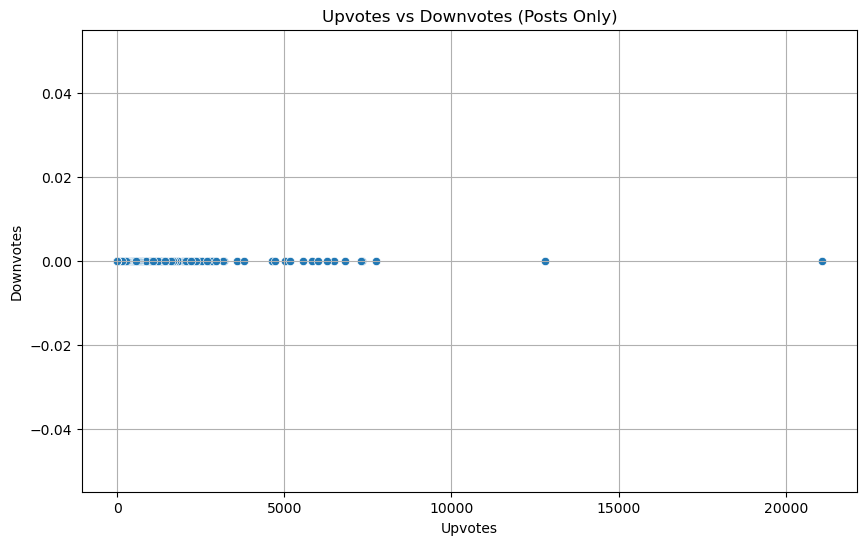

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['type'] == 'post'], x='upvotes', y='downvotes')
plt.title('Upvotes vs Downvotes (Posts Only)')
plt.xlabel('Upvotes')
plt.ylabel('Downvotes')
plt.grid(True)
plt.show()

**Top Authors by Total Upvotes**

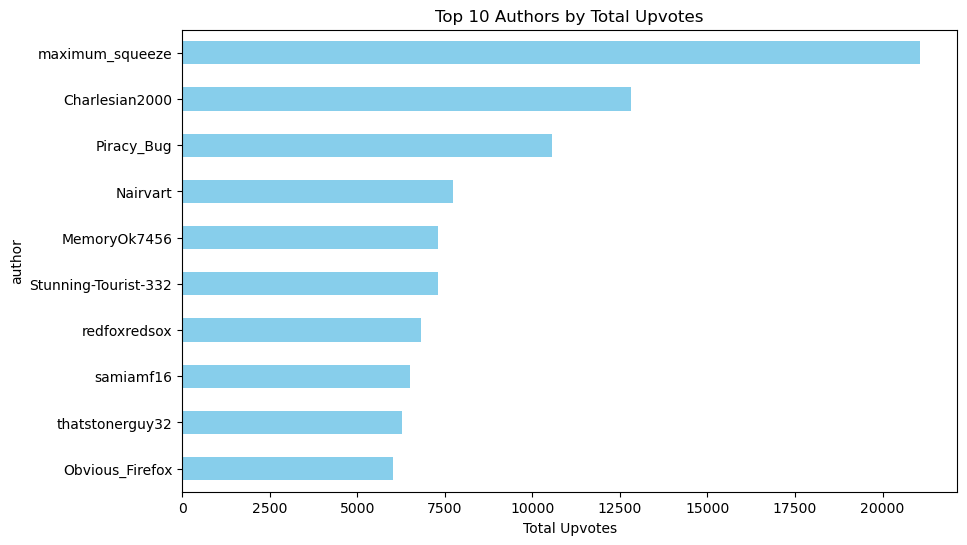

In [8]:
top_authors = df[df['type'] == 'post'].groupby('author')['upvotes'].sum().sort_values(ascending=False).head(10)

top_authors.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Authors by Total Upvotes')
plt.xlabel('Total Upvotes')
plt.gca().invert_yaxis()
plt.show()

**Post Count by Subreddit**

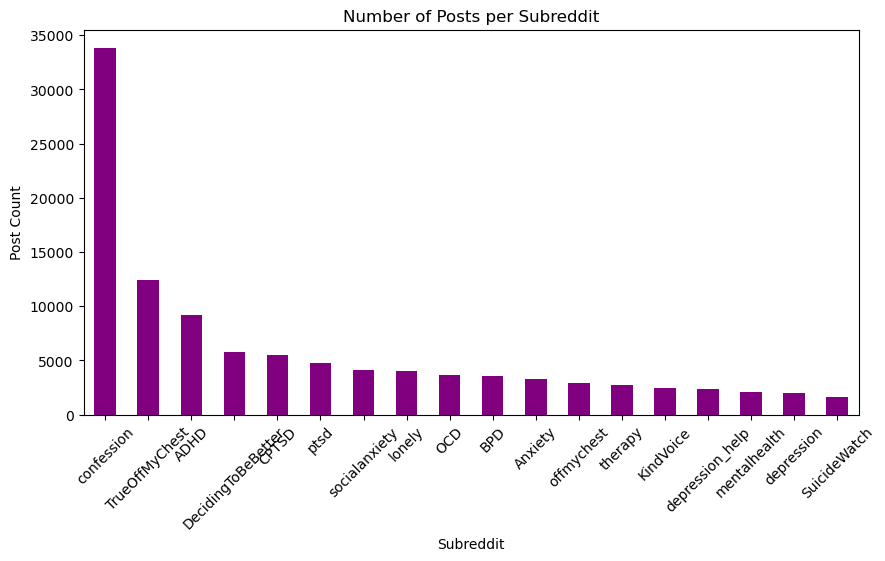

In [9]:
df['subreddit'].value_counts().plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Number of Posts per Subreddit')
plt.ylabel('Post Count')
plt.xlabel('Subreddit')
plt.xticks(rotation=45)
plt.show()

**Time Series of Posts per Day**

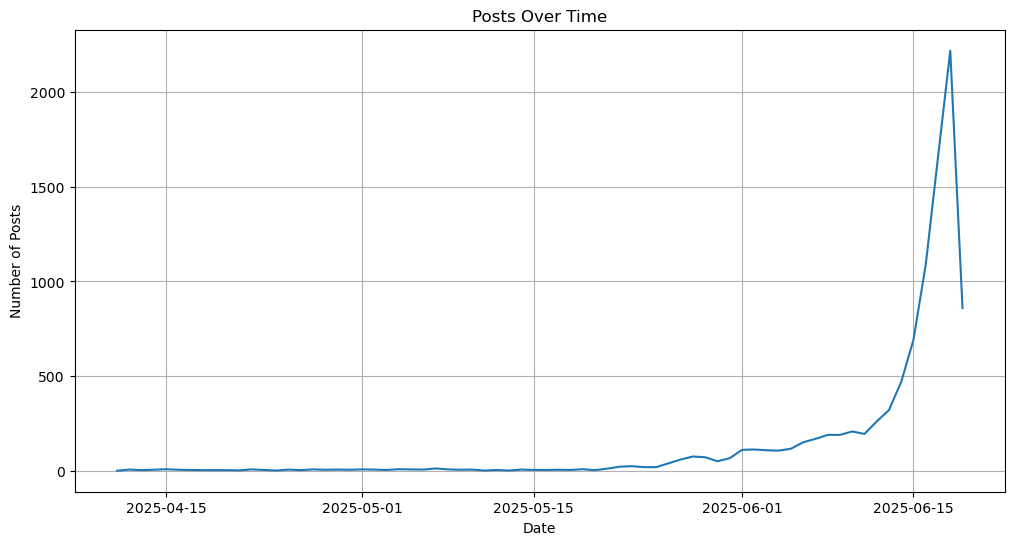

In [10]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date
daily_counts = df[df['type'] == 'post'].groupby('date').size()

daily_counts.plot(kind='line', figsize=(12, 6))
plt.title('Posts Over Time')
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.grid(True)
plt.show()

**Upvote Ratio Distribution**

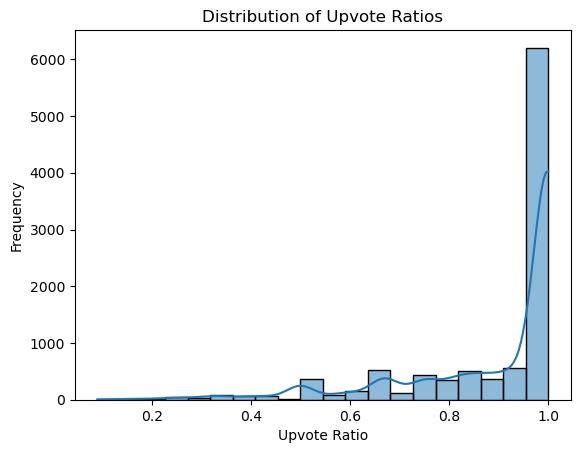

In [11]:
sns.histplot(df['upvote_ratio'], bins=20, kde=True)
plt.title('Distribution of Upvote Ratios')
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')
plt.show()

**Word Cloud**

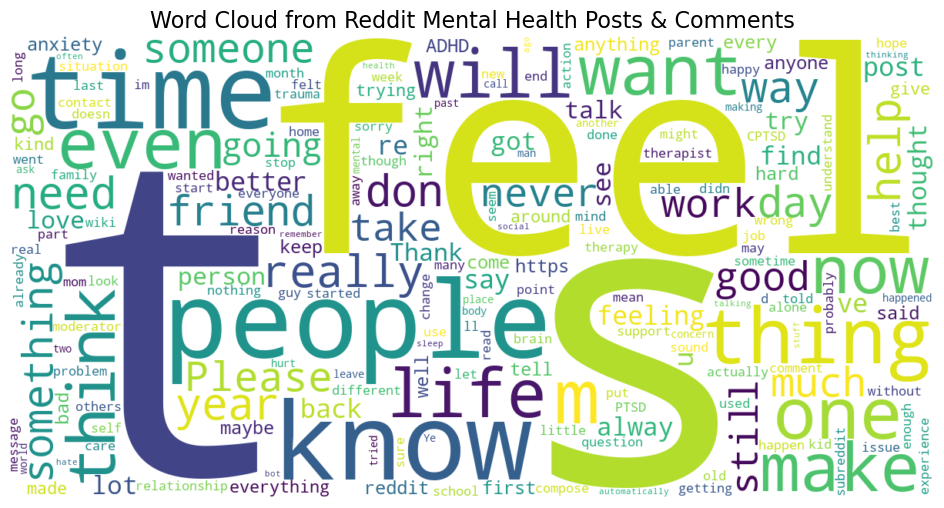

In [14]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
all_text = ' '.join(df['combined_text'].astype(str).tolist())

# Step 6: Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

# Step 7: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reddit Mental Health Posts & Comments', fontsize=16)
plt.show()

**Missing value Heatmap**

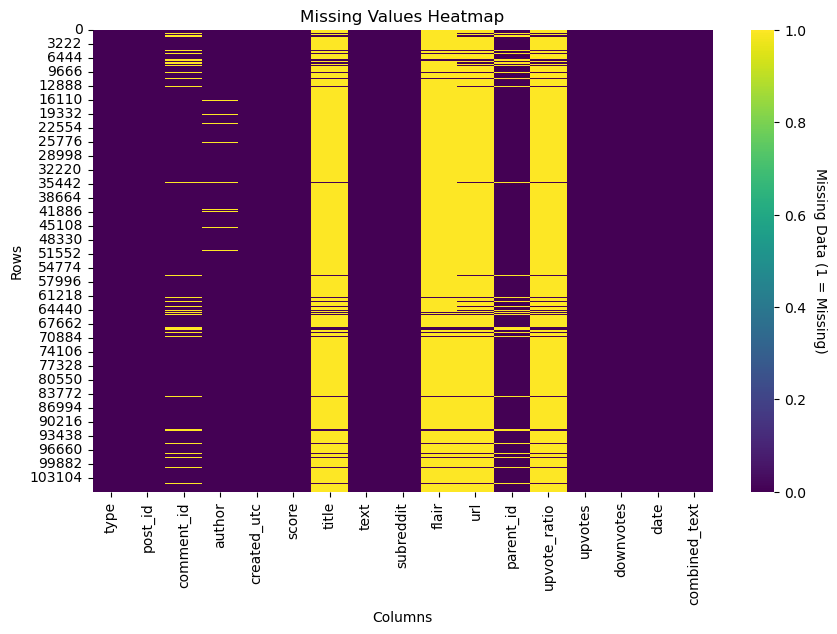

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Optional: makes plot clearer
ax = sns.heatmap(df.isnull(), cbar=True, cmap='viridis')

# Add custom legend title for clarity
colorbar = ax.collections[0].colorbar
colorbar.set_label('Missing Data (1 = Missing)', rotation=270, labelpad=15)

plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**Distribution of Posts**

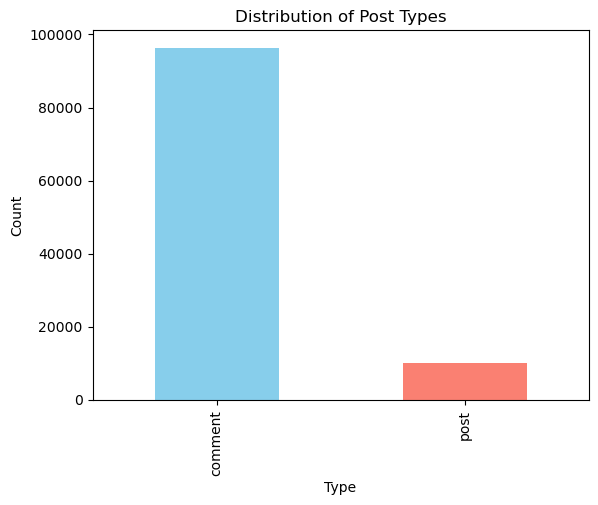

In [16]:
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Post Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Top 10 subreddit**

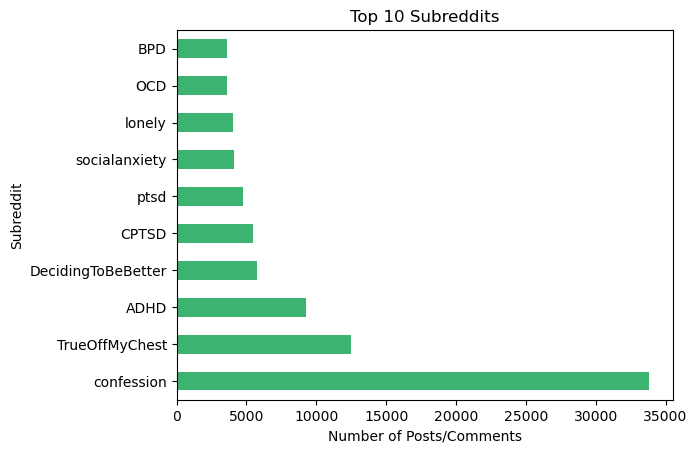

In [17]:
df['subreddit'].value_counts().head(10).plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Subreddits')
plt.xlabel('Number of Posts/Comments')
plt.ylabel('Subreddit')
plt.show()

**Distribution of text**

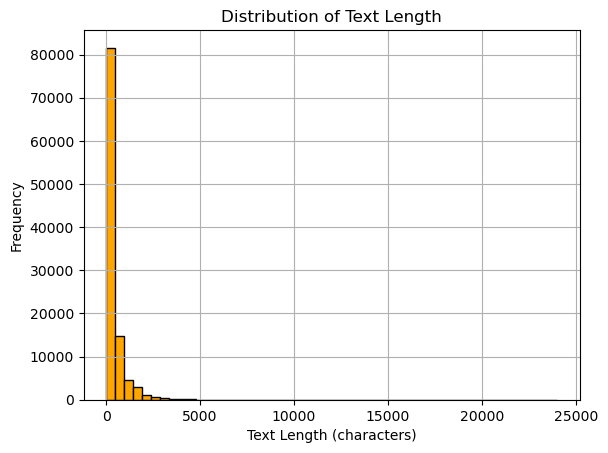

In [18]:
df['text_length'] = df['text'].astype(str).apply(len)
df['text_length'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

**Top 10 Flair Categories**

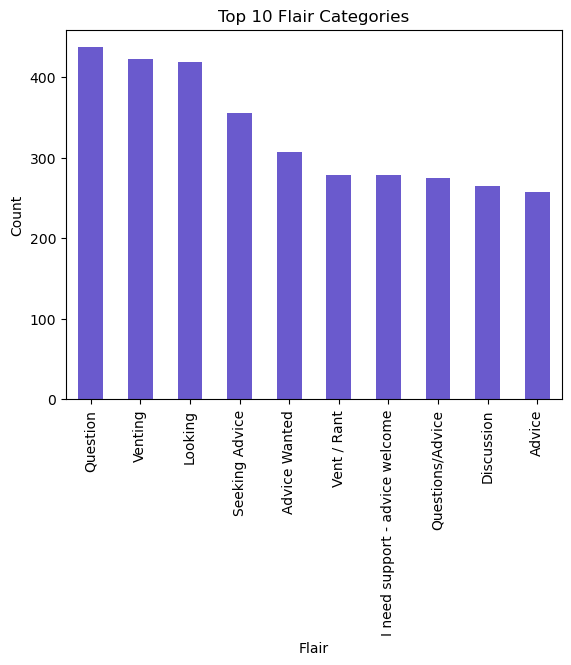

In [19]:
df['flair'].value_counts().dropna().head(10).plot(kind='bar', color='slateblue')
plt.title('Top 10 Flair Categories')
plt.ylabel('Count')
plt.xlabel('Flair')
plt.show()

In [25]:
# Keep only posts
posts_df = df[df["type"] == "post"].copy()

# Calculate post length (word count)
posts_df["post_length"] = (posts_df["title"].fillna("") + " " + posts_df["text"].fillna("")).apply(lambda x: len(str(x).split()))

# Group by subreddit and calculate averages
subreddit_stats = posts_df.groupby("subreddit").agg(
    avg_post_length=("post_length", "mean"),
    avg_upvote_ratio=("upvote_ratio", "mean")
    # avg_comments=("num_comments", "mean")
).reset_index()

print(subreddit_stats)

             subreddit  avg_post_length  avg_upvote_ratio
0                 ADHD       167.446847          0.919928
1              Anxiety       171.210811          0.949532
2                  BPD       224.279279          0.766324
3                CPTSD       302.273874          0.898919
4   DecidingToBeBetter       286.544144          0.897550
5            KindVoice       196.985586          0.922486
6                  OCD       190.079279          0.949045
7         SuicideWatch       165.963964          0.950631
8       TrueOffMyChest       389.212613          0.730468
9           confession       260.636036          0.713640
10          depression       217.392793          0.956324
11     depression_help       196.938739          0.945063
12              lonely       147.630631          0.899640
13        mentalhealth       202.751351          0.958414
14          offmychest       327.832432          0.877153
15                ptsd       234.832432          0.909063
16       socia

In [29]:
# Separate posts and comments
posts_df = df[df["type"] == "post"].copy()
comments_df = df[df["type"] == "comment"].copy()

# Calculate post length (title + selftext word count)
posts_df["post_length"] = (posts_df["title"].fillna("") + " " + posts_df["text"].fillna("")).apply(lambda x: len(str(x).split()))

# Initialize list for results
results = []

# Iterate over each subreddit
for subreddit, sub_posts in posts_df.groupby("subreddit"):
    # Count number of posts in this subreddit
    num_posts = len(sub_posts)
    
    # Count total comments in this subreddit
    num_comments = len(comments_df[comments_df["subreddit"] == subreddit])
    
    # Calculate averages
    avg_post_length = sub_posts["post_length"].mean()
    avg_upvote_ratio = sub_posts["upvote_ratio"].mean()
    avg_comments = num_comments / num_posts if num_posts > 0 else 0
    
    # Store results (rounded to 1 decimal)
    results.append({
        # "subreddit": subreddit,
        "avg_post_length": round(avg_post_length, 1),
        # "avg_upvote_ratio": round(avg_upvote_ratio, 1),
        # "avg_comments": round(avg_comments, 1)
    })

# Convert to DataFrame
subreddit_stats = pd.DataFrame(results)

print(subreddit_stats)


    avg_post_length
0             167.4
1             171.2
2             224.3
3             302.3
4             286.5
5             197.0
6             190.1
7             166.0
8             389.2
9             260.6
10            217.4
11            196.9
12            147.6
13            202.8
14            327.8
15            234.8
16            194.6
17            259.7


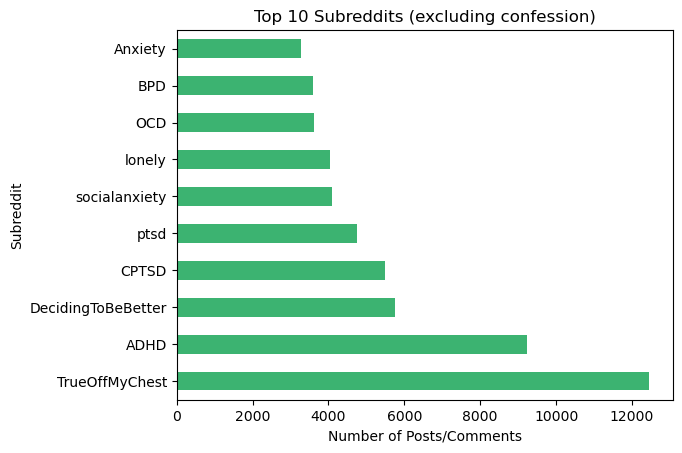

In [32]:
(df['subreddit']
   .loc[df['subreddit'] != 'confession']   # exclude "confession"
   .value_counts()
   .head(10)
   .plot(kind='barh', color='mediumseagreen'))

plt.title('Top 10 Subreddits (excluding confession)')
plt.xlabel('Number of Posts/Comments')
plt.ylabel('Subreddit')
plt.show()


===== Missing Value Analysis =====
Total posts: 106314
Missing flair: 99658 posts (93.74%)
Removed/Deleted posts: 0 posts (0.00%)


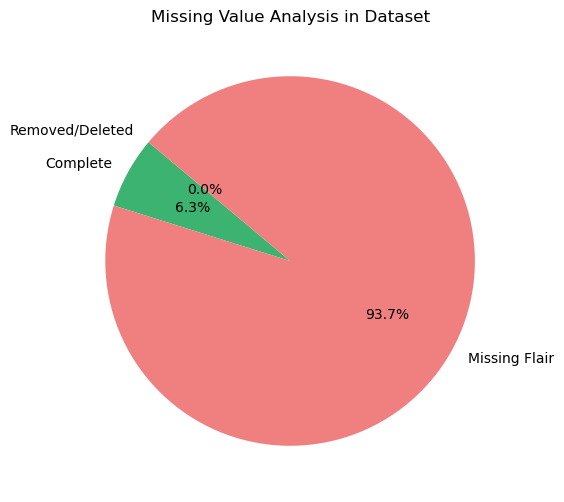

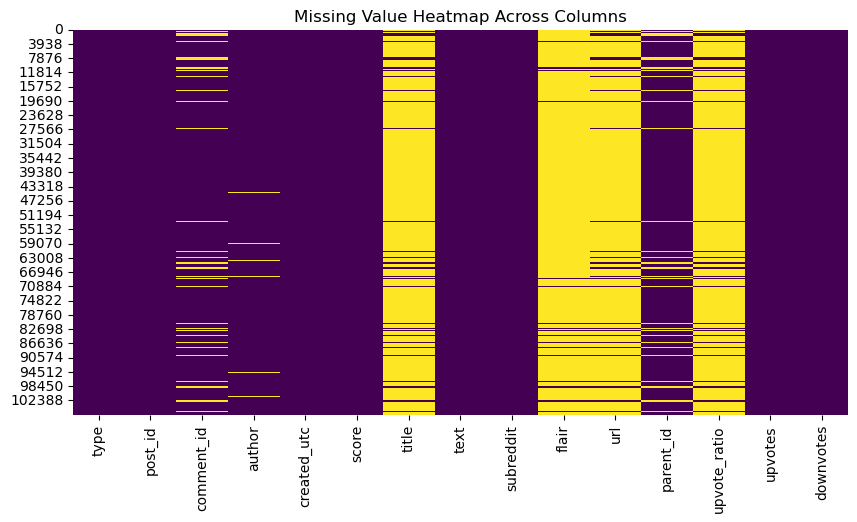

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# Missing Flair %
# --------------------
total_posts = len(df)
missing_flair = df['flair'].isna().sum()
missing_flair_percent = (missing_flair / total_posts) * 100

# --------------------
# Removed/Deleted %
# --------------------
removed_deleted = df['text'].str.lower().isin(['removed', 'deleted']).sum()
removed_deleted_percent = (removed_deleted / total_posts) * 100

# --------------------
# Print results
# --------------------
print("===== Missing Value Analysis =====")
print(f"Total posts: {total_posts}")
print(f"Missing flair: {missing_flair} posts ({missing_flair_percent:.2f}%)")
print(f"Removed/Deleted posts: {removed_deleted} posts ({removed_deleted_percent:.2f}%)")

# --------------------
# Visualization 1: Pie chart
# --------------------
labels = ['Complete', 'Missing Flair', 'Removed/Deleted']
values = [
    total_posts - missing_flair - removed_deleted,
    missing_flair,
    removed_deleted
]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['mediumseagreen', 'lightcoral', 'gold'])
plt.title("Missing Value Analysis in Dataset")
plt.show()

# --------------------
# Visualization 2: Heatmap of missing values
# --------------------
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap Across Columns")
plt.show()
